# Data Preparation

![](./images/Module1/Data_Processing.jpg)

### Learning Objectives:
1. Explore data that is accessible from Gene Expression Omnibus (GEO) database.
2. Be familiar with navigating the GEO website.
3. Use R command-line interface to download data from GEO.
4. Understand the associated tools and databases for processing the downloaded data.
5. Save processed data on Google Cloud Storage bucket.

### Neccessary Files:
This module requires the following file types as input:
1. A gene expression/read count matrix file. The matrix file is a table that contains the gene expression/read counts for each gene in each sample. The matrix can be saved in any format, e.g., TXT, CSV, TSV, etc, depending on what data processing pipelines that users use to generate the matrix file. The rows in the matrix are genes while the columns are samples. An example of gene expression matrix is shown as below:

|             | GSM119615          | GSM119616          | GSM119617          | GSM119618          | GSM119619          
|:-----------:|:------------------:|:------------------:|:------------------:|:------------------:|:------------------:|
| 1007_s_at | 3.04323425517482 | 3.05515684574341 | 3.14427732331235 | 3.15037838740089 | 3.08433619779214 |
| 1053_at   | 1.6989741372678  | 1.64505044064649 | 1.61853660336629 | 1.58921620872969 | 1.67627846534405 |
| 117_at    | 1.79575122130175 | 1.77071939589223 | 1.8055973820331  | 1.99579428666963 | 1.68806828653924 |
| 121_at    | 2.55317399472689 | 2.66845569269254 | 2.80145009438891 | 2.78421648767123 | 2.58863789167533 |
| 1255_g_at | 1.62669072298292 | 1.94005524422883 | 1.66316207819754 | 1.48387481399009 | 2.35409631475498 |
| 1294_at   | 2.15769922107969 | 2.10854830137981 | 2.132317337458   | 2.22314803446085 | 2.10343010241396 |
| 1316_at   | 2.73283077324695 | 2.77202911328326 | 2.8260604261457  | 2.89151133821962 | 2.81511829114971 |
| 1320_at   | 1.87645993353949 | 1.59382141967117 | 1.75432635895642 | 1.64210915908087 | 1.60903888696797 |

2. A spreadsheet containing sample information, which can be CSV or TSV format. In this spreadsheet, each row represents a sample, and each column represents its attribute, e.g., sample ID, disease status, tissue, platform, etc. An example of this spreadsheet is shown as below:

|             | title              | sampleID     | Sex.ch1            | condition          | region                            |
|:-----------:|:------------------:|:------------------:|:------------------:|:------------------:|:---------------------------------:|
| GSM119615 | EC control 1     | GSM119615        | male             | normal           | organ.region..entorhinal.cortex.|
| GSM119616 | EC control 2     | GSM119616        | male             | normal           | organ.region..entorhinal.cortex.|
| GSM119617 | EC control 3     | GSM119617        | male             | normal           | organ.region..entorhinal.cortex.|
| GSM119618 | EC control 4     | GSM119618        | male             | normal           | organ.region..entorhinal.cortex.|
| GSM119619 | EC control 5     | GSM119619        | female           | normal           | organ.region..entorhinal.cortex.|

<ins>**Note for users:**</ins> In our training modules of consensus pathway analysis, we will forcus on working with the processed data provided as a table, which ensures the reproducibility of all of the analyses introduced. 
Therefore, if users would like to learn how to process the raw data, we recommend users to learn it from other sources or looking into other training modules in this NIH NGIMS Sanbox project <a href="https://github.com/NIGMS/NIGMS-Sandbox/"> https://github.com/NIGMS/NIGMS-Sandbox/</a>, which consists the training sessions from processing high-throughput data to many different downstream analysis such as pathway analysis or multi omics data integration.

## Manually Upload Data to Cloud
### Upload data to Vertex AI Instance
Users can upload the data directly to the cloud by simply using the user interface of this Jupyter Notebook. The instructions are shown in the following figure:
![](./images/Module1/Data_Uploading_VAI.png)

### Upload data to Cloud Storage Bucket
Alternately, users can also upload their data to the Cloud Storage Bucket. The data may be lost after users delete the Vertex AI Instance, so storing them to the Cloud Storage Bucket allows users to use the data anytime they want. The instructions to upload the data to the Cloud Storage Bucket are shown in the following figure:
1. On the webpage of Google Cloud account, find and select `Cloud Storage`, then select `Buckets`.
2. Select `CREATE` button to create a new bucket.
3. Enter the information such as name, region, etc, required for creating the bucket. Note that users can define the access control in this step, and edit the access later once users wants to share their data.
4. Click `CREATE` once the all required information are provided.
5. The dashboard listing all the buckets users created is shown in the figure below:
![](./images/Module1/Data_CloudBucket.png)
7. Click on the bucket's name and start upload data to the bucket as following figure:
![](./images/Module1/Data_Uploading_CloudBucket.png)

Once the uploading is done, users can simply load the data to their instance by running the following command syntax in R code block: `system("gsutil cp gs://<BUCKET-NAME>/<FILE-NAME> <DESTINATION>")`. For example, we run the following command lines to load the data we store in the Cloud Storage Bucket:

In [ ]:
# Download the files from Cloud Storage Bucket to the "data" folder in current directory
system("gsutil cp gs://ccpa_bucket/GSE5281.csv ./data/")
system("gsutil cp gs://ccpa_bucket/GSE5281_SampleInfo.csv ./data/")

## Query Public Data Using R Command Lines:
Users can also using R to query expression data from many public databases such as: Gene Expression Omnibus (GEO), The Cancer Genome Atlas (TCGA), etc.
There are many R packages specifically built for querying data from these database. In this section, we will download and process the two Alzheimer's datasets from GE), with accession numbers: GSE5281 (Microarray) and GSE153873 (RNA-Seq), using the `GEOQuery` R package. For other databases, we suggest users to look for the designated packages on many R communities such as CRAN or BioConductor.

### Browsing data on The Gene Expression Omnibus (GEO):
The Gene Expression Omnibus (GEO) is a public repository that accumulates and serves gene expression data, such as microarray, next-generation sequencing, and other forms of high-throughput functional genomic data, from thousands of studies submitted by the scientific community. 
The data come with written descriptions of experimental design, sample characteristics, and methodology for studies of high-throughput gene expression and genomics. 

Browsing the content on the GEO website is user-friendly and relatively straightforward. First, users need to navigate to <a href="https://www.ncbi.nlm.nih.gov/geo/"> https://www.ncbi.nlm.nih.gov/geo/</a>. The GEO website interface is shown in the figure below:

![](./images/Module1/GEO_Website.png)

The most straight-forward is to click on the contents under the `Browse Content` column.
For example, if we click on the `Series`, we can see the following web page:

![](./images/Module1/GEO_Website_Screening.png)

From the figure, we can see the list data series that are available on GEO, provided with basic information about the series including accession ID, title, type of sequencing platform, organism, number of samples, referenced dataset ID, list of supplementary files, contact person and release data. Of note, the `Supplementary` column also specifies whether there are available raw data in the series. We can apply the filter in these columns to find the datasets that matched our research. Given the data series of interest, we can click on the accession number to further explore the data. 

Alternatively, if we know the accession number, we can provide it to the search box on the homepage. Now, we will search for the two datasets that we are going to use in the learning module.
The GEO website interface with the searching procedure of the example dataset is shown in the figure below:

![](./images/Module1/GEO_Website_Searchbox.png)

When the searching process is done, a webpage with a detailed record of the example dataset such as published date, title, organism, experiment type, dataset summary, etc. will be shown in the figure below:

![](./images/Module1/GEO_Dataset_Page.png)

At the bottom of the dataset page, users will find additional information about the dataset such as sequencing platform, number of samples, project ID, and links to download the expression data. Users can also click the `(http)` hyperlink to download all the samples or click `(custom)` to select and download the samples of interest. Note that, expression data downloaded at this step may be raw data and additional data processing needs to be done locally for further analysis.

To display the quiz in all the learning sub-modules, it is necessary to have the `IRdisplay` package pre-installed.
This package allows quizzes written in `html` format to show up in the notebook. Users can install the `IRdisplay` using the following command:
```
suppressWarnings(if (!require("IRdisplay")) install.packages("IRdisplay"))
suppressWarnings(library(IRdisplay))
```


In [1]:
# Run the following command to take the quiz
IRdisplay::display_html('<iframe src="./Quizzes/Quiz_Submodule1.html" width=100% height=250></iframe>')

### Access GEO Data Using R Command Line

Getting data from GEO is quite easy using <a href="https://bioconductor.org/packages/release/bioc/html/GEOquery.html">GEOquery</a> R package available in <a href="https://bioconductor.org/">Bioconductor</a>. Before starting, users will need to install the GEOquery package using the following command.

In [3]:
# Specify path to install site packages
# .libPaths("/home/jupyter/.R/library")
.libPaths("/home/han/R/x86_64-pc-linux-gnu-library/4.1")

In [4]:
# Install required package
suppressMessages({
    
    if (!require("BiocManager", quietly = TRUE)) {
        suppressWarnings(install.packages("BiocManager"))

    }  
    suppressWarnings(BiocManager::install("GEOquery", update = F))
})

# Check if the package is installed
suppressMessages(library("GEOquery"))

#### Access GEO Microarray Dataset: GSE5281
We can use the `getGEO` function from the `GEOquery` package to download GEO dataset. First, users have to specify the accession ID of the dataset. For this demonstration, we will use the same dataset `GSE48350`.

In [5]:
# Specify GEO accession ID
accession_ID <- "GSE5281"

# Specify directory to save the data
save_Path <- "./data"

# Download the data
suppressMessages({
    gse <- getGEO(GEO = accession_ID, destdir = save_Path)
})

To use the `getGEO` function, you need to pass the following arguments:

- `GEO`: A character string representing the GEO accession ID
- `destdir`: A character string representing the destination directory to save the downloaded data.

The `getGEO` function will return a list of `ExpressionSet` objects. This list can contain more than 1 object. It is because some datasets on GEO may be derived from different microarray platforms. Therefore, each object in the returned list is with repect to data generated from a particular platform.
We can find out how many platforms were used by checking the length of the `gse` object.

In [6]:
# Check how many platforms used
message(paste0("Number of platforms: ", length(gse)))

Number of platforms: 1



The result shows that we have only one dataset that belongs to the microarray platform mentioned GEO dataset page.
Next, we can access the gene expression matrix, samples and genes information using the specific accesor functions as follows:

In [7]:
# Extract the dataset from the gse object
data <- gse[[1]]

# Access to the gene expression matrix
GSE5281Exprs <- exprs(data)

# Access to the samples information
GSE5281Samples <- pData(data)

# Access to the genes information
GSE5281Genes <- fData(data)

# Check the number of samples and genes
print(paste0("The dataset contains ", dim(GSE5281Samples)[1] , " samples and ", dim(GSE5281Genes)[1], " genes"))

[1] "The dataset contains 161 samples and 54675 genes"


In [7]:
# Run the following command to take the quiz
IRdisplay::display_html('<iframe src="./Quizzes/Quiz_Submodule1-1.html" width=100% height=250></iframe>')

We can check the data tables we have just accessed by specifying the indexes of rows and columns as follows:

In [22]:
message("The example of gene expression matrix")
GSE5281Exprs[1:10, 1:10]

The example of gene expression matrix



,GSM119615,GSM119616,GSM119617,GSM119618,GSM119619,GSM119620,GSM119621,GSM119622,GSM119623,GSM119624
1007_s_at,693.973300,807.145140,1722.625000,1668.05750,2231.29690,990.541000,1396.82420,1026.056500,736.770300,938.81710
1053_at,9.755318,19.052270,13.060389,14.65225,138.67683,7.186742,10.17089,34.056934,7.829473,40.23533
117_at,13.346846,18.217276,97.425470,98.19795,106.46844,98.710520,164.32666,46.306164,35.067910,72.86490
121_at,173.092450,289.315400,537.182800,496.34656,477.86517,355.092000,467.56790,294.583280,224.524060,298.28473
1255_g_at,52.616950,110.375984,99.021736,17.30677,628.81616,105.254600,142.26918,123.016136,183.396910,180.81425
1294_at,67.753624,96.780740,76.282050,189.81960,276.47656,130.088290,131.51334,109.670810,63.197280,78.26386
1316_at,209.412200,470.433070,908.266360,1029.78850,1366.78370,624.679260,1589.27660,858.423000,643.095000,412.51947
1320_at,10.765010,3.834024,7.970618,3.46938,11.24563,22.197855,7.77328,7.727498,4.196418,12.77877
1405_i_at,10.559881,27.871660,121.391370,48.15317,3.13764,8.126172,73.90697,9.745271,6.104734,16.48073
1431_at,38.878853,73.023575,17.437328,10.58778,147.82320,24.068861,24.42770,58.589240,84.349400,36.49381


In [23]:
message("Example of sample information table")
GSE5281Samples[1:10, 1:10]

Example of sample information table



,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM119615,EC control 1,GSM119615,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119616,EC control 2,GSM119616,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119617,EC control 3,GSM119617,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119618,EC control 4,GSM119618,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119619,EC control 5,GSM119619,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119620,EC control 6,GSM119620,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119621,EC control 7,GSM119621,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119622,EC control 8,GSM119622,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug
GSM119623,EC control 9,GSM119623,Public on Jul 10 2006,Jul 10 2006,Jun 26 2019,RNA,1,"brain, Entorhinal Cortex",Homo sapiens,Sample Amount: 10 ug


The ```GSE5281Samples``` contains the metadata of each sample such as title, status, GEO accession, submission data, etc. 

In [24]:
message("Example of gene information table")
GSE5281Genes[1:10, 10:12]

Example of gene information table



,Gene Title,Gene Symbol,ENTREZ_GENE_ID
,<chr>,<chr>,<chr>
1007_s_at,discoidin domain receptor tyrosine kinase 1 /// microRNA 4640,DDR1 /// MIR4640,780 /// 100616237
1053_at,"replication factor C (activator 1) 2, 40kDa",RFC2,5982
117_at,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310
121_at,paired box 8,PAX8,7849
1255_g_at,guanylate cyclase activator 1A (retina),GUCA1A,2978
1294_at,microRNA 5193 /// ubiquitin-like modifier activating enzyme 7,MIR5193 /// UBA7,7318 /// 100847079
1316_at,"thyroid hormone receptor, alpha",THRA,7067
1320_at,"protein tyrosine phosphatase, non-receptor type 21",PTPN21,11099
1405_i_at,chemokine (C-C motif) ligand 5,CCL5,6352


As we can see, the the ```GSE5281Genes``` shows us the probeID, title, gene symbol, gene ID, and many more. 

#### Access GEO RNA-Seq Dataset: GSE153873

Microarray data deposited on GEO are usually processed by the authors. In contrast, RNA-Seq data deposited on GEO database are read count matrix without any data normalization. Therefore, there are no `Series Matrix File(s)` available to download. However, the count matrix file is saved as **Supplementary File**. To download it, we will use the function ```getGEOSuppFiles``` instead.

In [27]:
# Specify GEO accession ID
accession_ID <- "GSE153873"

# Specify directory to save the data
save_Path <- "./data/GSE153873"

# Download supplentary files
tmp <- getGEOSuppFiles(GEO = accession_ID, baseDir = "./data", fetch_files = TRUE)

# Check files in the directory
list.files(save_Path)

[1] "GSE153873_AD.vs.Old_diff.genes.xlsx" "GSE153873_summary_count.ercc.txt.gz"
[3] "GSE153873_summary_count.star.txt.gz"

In this code snippet, we use the function getGEOSuppFiles() to download the supplementary files of the dataset GSE153873. The function has the following parameters: 
- `GEO` – a character parameter that specifies the GEO accession number,
- `baseDir` – a character parameter that specifies the directory for downloaded data, and
- `fetch_files` – a logical parameter, with TRUE means telling the function to actually download the files and FALSE telling the function to just return the filenames that would have been downloaded.

The function returns a data frame in which row names represent the full path to the downloaded files. . We can check the downloaded file in this folder using the function `list.files()`. As we can see in the console output, the raw count data is saved under the name `GSE153873_summary_count.star.txt.gz`. To get the data matrix, users need to run the following command lines:

In [36]:
# Get the path to the count matrix file:
countsFile <- file.path(save_Path, "GSE153873_summary_count.star.txt.gz")

# Read the count matrix file:
GSE153873Exprs <- read.table(countsFile, header = TRUE, sep = "\t", fill = 0, row.names = 1, check.names = FALSE)

# Examine the RNASeqExprs:
message("Examine the read count matrix")
GSE153873Exprs[1:10, 1:10]

Examine the read count matrix



,20-1T-AD,13-11T-Old,15-13T-Old,16-14T-Old,3-17T-Young,5-18T-Young,7-19T-Young,21-1A-AD,23-2A-AD,26-3A-AD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
SGIP1,1405,1405,1169,2408,859,1164,1402,1441,1003,1265
NECAP2,295,460,334,347,617,585,372,343,374,315
AZIN2,356,306,385,507,787,751,577,238,209,241
AGBL4,191,200,173,323,36,89,184,229,129,154
CLIC4,876,1443,639,792,4806,5968,1392,1117,1247,929
SLC45A1,291,329,298,636,139,204,278,193,152,178
TGFBR3,639,650,506,370,425,447,282,792,727,461
DBT,623,726,513,633,751,758,498,714,756,655
PRUNE1,297,237,200,390,231,254,252,342,228,300


As we can see, the count matrix file has rows as genes and columns as samples. Similar to the microarray dataset, we use the `getGEO` function to get the sample information as follows:

In [31]:
# Download the dataset
suppressMessages({
    gse <- getGEO(GEO = accession_ID, destdir = save_Path)
})

# Extract the dataset from the gse list:
data <- gse[[1]]

In [37]:
# Access to the sample information table:
GSE153873Samples <- pData(data)

# Examine the RNASeqSamples
message("Examine the sample information")
GSE153873Samples[1:10, 1:10]

Examine the sample information



,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM4656348,13-11T-Old,GSM4656348,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656349,15-13T-Old,GSM4656349,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656350,20-1T-AD,GSM4656350,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656351,16-14T-Old,GSM4656351,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656352,3-17T-Young,GSM4656352,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656353,5-18T-Young,GSM4656353,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656354,7-19T-Young,GSM4656354,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656355,21-1A-AD,GSM4656355,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe
GSM4656356,23-2A-AD,GSM4656356,Public on Jul 07 2020,Jul 06 2020,Oct 13 2020,SRA,1,Frozen postmortem brain tissue,Homo sapiens,tissue: Lateral temporal lobe


## Process Data For Downstream Analysis

Once the data is downloaded, we need to perform data processing to prepare the data for differential analysis and pathway analysis. The data processing includes the following steps: (i) Data normalization, (ii) Sample condition extraction, and (iii) Gene IDs conversion.

### Data normalization
Typically, data normalization can be performed for quality assurance. However, different downstream analysis methods may require different data normalization techniques. Therefore, we suggest users to consult these methods' document to choose the most appropriate normalization technique. For example, if a method requires the expression to be in log-scale normalization, we can check the scale the data as follows:

In [8]:
# Show a summary of the expression data using the summary function
summary(GSE5281Exprs[, 1:5])

   GSM119615           GSM119616           GSM119617          GSM119618       
 Min.   :    0.075   Min.   :    0.074   Min.   :    0.25   Min.   :    0.33  
 1st Qu.:   13.880   1st Qu.:   13.943   1st Qu.:   24.50   1st Qu.:   22.16  
 Median :   44.928   Median :   47.379   Median :   80.73   Median :   71.63  
 Mean   :  222.780   Mean   :  233.425   Mean   :  226.92   Mean   :  234.00  
 3rd Qu.:  151.931   3rd Qu.:  158.202   3rd Qu.:  187.48   3rd Qu.:  178.68  
 Max.   :19236.023   Max.   :26390.730   Max.   :75634.99   Max.   :58651.38  
   GSM119619       
 Min.   :    0.29  
 1st Qu.:   32.79  
 Median :  117.42  
 Mean   :  771.06  
 3rd Qu.:  475.33  
 Max.   :68655.84  

In [10]:
# Show value range of the expression data using the range function
range(GSE5281Exprs)

[1] 5.537930e-02 5.280435e+05

From the summary of the data above, we can clearly see that the maximum expression values can be in the scale of thousands, while the average expression values in each sample are below one. One common step is to perform quartile filtering to remove the outlier and missing expression values. Also, we will need to perform a transformation to ensure the distributions of all samples are similar. Then, a `boxplot` can also be generated to see if the data have been correctly normalized. We can use the sample code below to perform all of those steps.

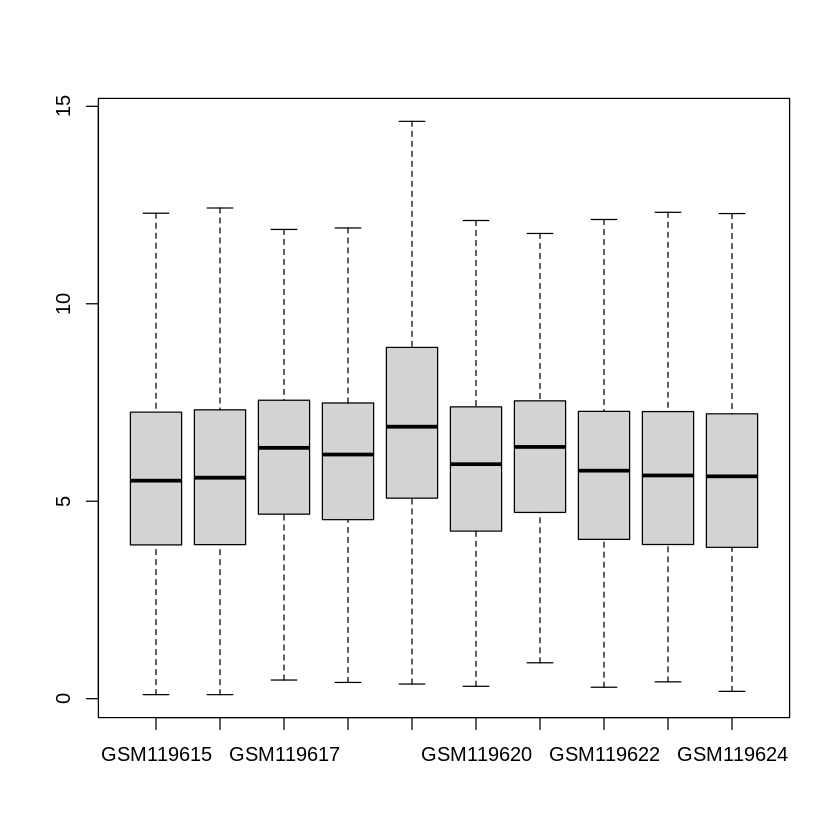

In [12]:
# Calculate the data quantile and remove the NA value
qx <- as.numeric(quantile(GSE5281Exprs, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm = T))
# Define LogC variable (boolean) to decide whether or not to perform the log transformation
# If 99% of the data > 100 or (range > 50 and 25% of the data > 0), LogC = True and perform log transformation
LogC <- (qx[5] > 100) ||
    (qx[6]-qx[1] > 50 && qx[2] > 0)
# Replace negative values with NA and perform log transformation if logC is True
if (LogC) {
    GSE5281Exprs[which(GSE5281Exprs <= 0)] <- NaN #
    norm_expression_data <- log2(GSE5281Exprs+1)
}
# Plot the boxplot of 10 samples
boxplot(x = norm_expression_data[, 1:10], outline = FALSE)

**Notes:** Most of the packages for analyzing RNA-Seq data embed a normalization process in their functions. Therefore, we will not perform data normalization for the GSE153873 dataset we have just downloaded.

In [12]:
# Run the following command to take the quiz
IRdisplay::display_html('<iframe src="./Quizzes/Quiz_Submodule1-2.html" width=100% height=250></iframe>')

### Samples Condition Extraction
In pathway analysis, it is crucial to determine which conditions of sample are being compared to one another. 
. In our example, we are comparing gene expression between two patient groups: *normal* and *Alzheimer’s*. To this aim, users can execute the following code snippets

#### Microarray dataset: GSE5281

In [13]:
# Add a column specifying the condition of each sample (normal or Alzheimer's)
GSE5281Samples$condition <- ifelse(grepl("normal", GSE5281Samples$characteristics_ch1.8), "normal", "alzheimer")

# Factorize the new column
GSE5281Samples$condition <- factor(GSE5281Samples$condition)

# Add a new column to specify the region of the sample tissue,
# use make.names() to remove special characters and
# use tolower() to make all characters lowercase
GSE5281Samples$region <- make.names(GSE5281Samples$characteristics_ch1.4)
GSE5281Samples$region <- tolower(GSE5281Samples$region)

# Factorize the newly added column
GSE5281Samples$region <- factor(GSE5281Samples$region)

The samples of the GSE5281 dataset fall into two conditions: *normal* and *Alzheimer’s,* which are specified in the `characteristics_ch1.8` column. Each sample is also associated with a specific brain region, such as the entorhinal cortex, hippocampus, primary visual cortex, and so on, denoted in the `characteristics_ch1.4` column. Consequently, both attributes serve as conditions to determine the groups of patients.

The initial step in the code snippet involves the addition of two new columns that represent the sample’s condition and the associated brain region to the sample information. These new columns are essentially cleaner versions of the original `characteristics_ch1.8` and `characteristics_ch1.4` columns. The original columns are often manually curated and may contain special characters or duplicated data, which could potentially lead to errors in the analysis. Hence, it is crucial to perform data cleaning before proceeding with any further steps. We can check the statisitcs of the two new columns as follows:


In [15]:
# Examine the newly added columns
summary(GSE5281Samples[, c("condition", "region")])

     condition                                    region  
 alzheimer:87   organ.region..entorhinal.cortex.     :23  
 normal   :74   organ.region..hippocampus.           :23  
                organ.region..medial.temporal.gyrus. :28  
                organ.region..posterior.cingulate.   :13  
                organ.region..posterior.singulate.   : 9  
                organ.region..primary.visual.cortex. :31  
                organ.region..superior.frontal.gyrus.:34  

#### RNA-Seq dataset: GSE153873

In [ ]:
# Add a column specifying the condition of the sample,
# which can be either normal or alzheimer
RNASeqSampleConditions <- ifelse(grepl("Alzheimer", GSE153873Samples$characteristics_ch1.1), "alzheimer", "normal")

# Factorize the newly added column
GSE153873Samples$condition <- factor(RNASeqSampleConditions)

# Examine the newly added column
summary(GSE153873Samples[, c("condition")])

For this dataset, the `characteristics_ch1.1` column defines the two conditions of the samples: normal and Alzheimer’s. Therefore, we added the `condition` into the `GSE153873Samples` to represent the groups of patients.

### Gene IDs Conversion

In this section, we will create a gene IDs conversion data frame that will be used to convert the gene IDs used in the dataset into the common IDs such as Symbol or Entrez ID. It will be useful in the gene set or pathway analysis, which requires that gene sets and expression data use the same type of gene IDs (e.g., usually Entrez Gene ID or Gene symbol). Dependent on the platform used to generate the expression data, there exists an R package that can be used to annotate the genes in the data to Entrez Gene ID or Gene symbol. For example, the platform of the dataset GSE5281 is GPL570, which has an annotation package on Bioconductor named *hgu133plus2.db*. The list of available annotation packages can be found at: <a href="https://bioconductor.org/packages/3.18/data/annotation/"> https://bioconductor.org/packages/3.18/data/annotation/</a>.

#### Microarray Dataset: GSE5281

To create the gene IDs mapping data frame, users can execute the following code snippets:

In [16]:
# Install the genome wide annotation database for human
if (!require("BiocManager", quietly = TRUE))
 install.packages("BiocManager")
BiocManager::install("hgu133plus2.db", update = F)

# Mappping for GSE5281
GSE5281Genes <- rownames(GSE5281Exprs) 
GSE5281GenesMapping <- AnnotationDbi::select(x = hgu133plus2.db, 
                                        keys = GSE5281Genes, 
                                        columns = c("PROBEID", "SYMBOL", "ENTREZID")) 
colnames(GSE5281GenesMapping) <- c("FROM", "SYMBOL", "ENTREZID")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.22), R 4.1.2 (2021-11-01)

Installing package(s) 'org.Hs.eg.db', 'hgu133plus2.db'

also installing the dependencies ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘GenomeInfoDb’, ‘Biostrings’, ‘IRanges’, ‘S4Vectors’, ‘KEGGREST’, ‘AnnotationDbi’


Warning message in install.packages(...):
“installation of package ‘RCurl’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘GenomeInfoDb’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘Biostrings’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘KEGGREST’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘AnnotationDbi’ had no

ERROR: Error in library(org.Hs.eg.db): there is no package called ‘org.Hs.eg.db’


To perform the gene IDs mapping, we utilize the `select()` function from the AnnotationDbi package to query various genome-wide annotation databases and to convert gene IDs to the desired IDs. This function requires the following parameters: `x` – an *AnnotationDb* object such as *hgu133plus2.db*, `keys` – a vector containing the current IDs, and `columns` – a vector specifying which types of data (i.e., ID types) can be returned as output. In our example, we choose to return: PROBE ID, SYMBOL, and ENTREZ ID. We then rename the columns of the returned data frame as "FROM", "SYMBOL", and "ENTREZID", respectively. Users can examine this dataframe as follows:

In [ ]:
# Examine the mapping dataframe for GSE5281
head(GSE5281GenesMapping)

#### RNA-Seq Dataset: GSE153873

To create the gene IDs mapping for this dataset, we can run the following command lines:

In [ ]:
# Install the genome wide annotation database for human
if (!require("BiocManager", quietly = TRUE))
 install.packages("BiocManager")
BiocManager::install("org.Hs.eg.db")

# Load the annotation database
library(org.Hs.eg.db)

# Get current gene IDs used in RNA-Seq dataset
GSE153873Genes <- rownames(GSE153873Exprs)

# Create a mapping dataframe
GSE153873GenesMapping <- AnnotationDbi::select(
    x = org.Hs.eg.db, 
    keys = GSE153873Genes, 
    keytype = "SYMBOL", 
    columns = c("SYMBOL", "SYMBOL", "ENTREZID"))

colnames(GSE153873GenesMapping) <- c("FROM", "SYMBOL", "ENTREZID")

For this dataset, gene symbols are used as the IDs. To create the mapping dataframe, we need to load the package `org.Hs.eg.db` package for human’s genome-wide annotation. Users can install this package from Bioconductor following the provided instructions in our code snippet. After installation, it is necessary to load this database and input it as a parameter for the `select(`) function, whose parameters are set to be: `x` – an AnnotationDb `org.Hs.eg.db`, `keys` – a vector containing the current IDs `GSE153873Genes`, `keytype` – a character parameter indicating the type of current gene IDs `SYMBOL`, and `columns` – a vector specifying which types of data are returned as output.

## Exporting the Data
When we have successfully retrieved expression data from GEO, we can export the expression data to a `.csv` file format for inspection in other software such as Excel using the `write_csv` function from `readr` package.
In the code below, we will save the raw expression matrix, normalized expression matrix, and grouping information to  `.csv` files.

In [16]:
# Convert raw and normalized expression matrix to data frames and save them to csv files
expression_data <- as.data.frame(GSE5281Exprs)
norm_expression_data <- as.data.frame(norm_expression_data)

# Create a sub-directory data folder to save the expression matrix if it is not available
dir <- getwd()
subDir <- "/data/export/"
path <- paste0(dir, subDir)
# check if the saving folder exists
if (!file.exists(path)){
    dir.create(file.path(path))
}
# Save expression values and group to the csv files format in the local folder
write.csv(expression_data, file = "./data/export/raw_GSE5281.csv")
write.csv(norm_expression_data, file = "./data/export/normalized_GSE5281.csv")
write.csv(GSE5281Samples, file = "./data/samples_GSE5281.csv")
write.csv(GSE5281GenesMapping, file = "./data/genes_GSE5281.csv")

The `.csv` format is a very simple format that might not suitable to store big datasets.
We can export the expression data to `.rds` format, which is more memory efficient for loading and saving the data.
We can save all the relevant data in a `list` and write to the disk using the built in `saveRDS` function.

In [17]:
# Putting expression data, sample groups, and gene IDs mapping into a list
GSE5281Dataset <- list(expression_data = GSE5281Exprs, 
                       samples = GSE5281Samples, 
                       genes = GSE5281GenesMapping)

GSE153873Dataset <- list(expression_data = GSE153873Exprs, 
                       samples = GSE153873Samples, 
                       genes = GSE153873GenesMapping)

# Save the data to the local disk using rds format
saveRDS(GSE5281Dataset, file = "./data/GSE5281.rds")
saveRDS(GSE153873Dataset, file = "./data/GSE153873.rds")

## Storing files in a Google Cloud Bucket

To run gsutil commands, the user can either create a code cell within the Jupyter notebook by clicking the + button at the top or 
click on File -> New -> Terminal to open the terminal 
 
 
To create buckets in R, it is best to use the system command that allows you to run bash commands in R. One thing to note is that the bucket must be named following some rules. Please check out the rules [here](https://cloud.google.com/storage/docs/buckets).

In [18]:
# Set our bucket name, remember it needs to be unique
# Replace <BUCKET_NAME> with the name of your bucket
system("gsutil mb gs://ccpa_bucket", intern = TRUE)

Warning message in system("gsutil mb gs://ccpa_bucket", intern = TRUE):
“running command 'gsutil mb gs://ccpa_bucket' had status 1”


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

The command to copy data from the local disk to the Google Cloud Bucket is as follows:

`gsutil cp PATH_TO_LOCAL_FOLDER gs://PATH_IN_GOOGLE_BUCKET`

For example, if we want to copy the file `./data/GSE5281.rds` we can use the following command.

In [19]:
# Replace <BUCKET_NAME> with name of your bucket that was perviously made
system("gsutil cp ./data/GSE5281.rds gs://ccpa_bucket", intern = TRUE)


character(0)

We can download files from Google Cloud Bucket using the following command. Here we are downloading the data to current directory of this notebook.

In [20]:
system("gsutil cp gs://ccpa_bucket/GSE5281.rds ./")

Now we can try to load the data file that we have just downloaded from Google Cloud Bucket.

In [ ]:
# Load the data downloaded from Google Cloud Bucket in current directory
data <- readRDS("./GSE5281.rds")
# Print out the keys of the data list
names(data)

In [32]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 11 (bullseye)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.13.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] hgu133plus2.db_3.13.0 org.Hs.eg.db_3.18.0   AnnotationDbi_1.64.1 
[4] IRanges_2.36.0        S4Vectors_0.40.2      GEOquery_2.70.0      
[7] Biobase_2.62.0        BiocGenerics_0.48.1   BiocManager_1.3